In [ ]:
import pandas as pd

### Load Dataset

In [ ]:
df = pd.read_csv('text.csv', encoding='utf-8', on_bad_lines='skip') #load csv file

In [ ]:
#taking 10000 rows only from df
df.shape


(12918, 2)

In [ ]:
df.head()# checking first 5 rows of dataset

,text,target
0,"\r\n﻿\n४ असोज, हेटौंडा । आन्तरिक तथा बाह्य पर्...",14
1,"\r\n﻿ \n\n२४ भदौ, चितवन । चितवनमा अन्य जिल्लाम...",10
2,"\r\n﻿तेह्रथुम, १३ असोज । तेह्रथुम छातेढुङगा–२ ...",10
3,\r\n﻿पाल्पाका ग्रामीण भेगका विद्यार्थीलाई दुई ...,7
4,\r\n﻿राज्यकोषमा सरकारको स्वेच्छाचारिता रोक्न व...,8


In [ ]:
#mapping the target column , extract from the source dataset
df["category"] = df["target"].map({
    0: "Auto",
    1: "Bank",
    2: "Blog",
    3: "Business Interview",
    4: "Economy",
    5: "Education",
    6: "Employment",
    7: "Entertainment",
    8: "Interview",
    9: "Literature",
    10: "National News",
    11: "Opinion",
    12: "Sports",
    13: "Technology",
    14: "Tourism",
    15: "World"
})###now we label the target columns

In [ ]:
df.head()

,text,target,category
0,"\r\n﻿\n४ असोज, हेटौंडा । आन्तरिक तथा बाह्य पर्...",14,Tourism
1,"\r\n﻿ \n\n२४ भदौ, चितवन । चितवनमा अन्य जिल्लाम...",10,National News
2,"\r\n﻿तेह्रथुम, १३ असोज । तेह्रथुम छातेढुङगा–२ ...",10,National News
3,\r\n﻿पाल्पाका ग्रामीण भेगका विद्यार्थीलाई दुई ...,7,Entertainment
4,\r\n﻿राज्यकोषमा सरकारको स्वेच्छाचारिता रोक्न व...,8,Interview


## Read and understand the shape & types

In [ ]:
df.shape
# rows - 14364 news articles
# column - 3 columns

(12918, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12918 entries, 0 to 12917
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      12918 non-null  object
 1   target    12918 non-null  int64 
 2   category  12918 non-null  object
dtypes: int64(1), object(2)
memory usage: 302.9+ KB


In [ ]:
#convert target to cateogry type
df['target'] = df['target'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12918 entries, 0 to 12917
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   text      12918 non-null  object  
 1   target    12918 non-null  category
 2   category  12918 non-null  object  
dtypes: category(1), object(2)
memory usage: 215.3+ KB


## Data Cleaning :Missing values, duplicates, data types


In [ ]:
df.isnull().sum() #checking missing values

,0
text,0
target,0
category,0


In [ ]:
#checking duplicated values
df.duplicated().sum()

np.int64(3)

In [ ]:
#droping duplicated rows
df.drop_duplicates(keep='first',inplace = True)

In [ ]:
df.duplicated().sum() #now no duplicated values

np.int64(0)

### EDA (Exploratory Data Analysis)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

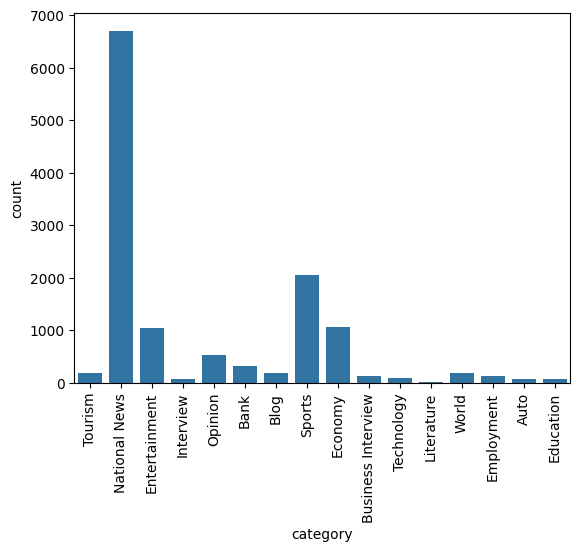

In [ ]:
#don't show the target
ax = sns.countplot(x = 'category',data=df)
ax.tick_params(axis = 'x', labelrotation = 90)

In [ ]:
df['category'].value_counts(normalize=True)*100

,proportion
category,
National News,51.908633
Sports,15.919473
Economy,8.269454
Entertainment,8.176539
Opinion,4.103755
Bank,2.439024
Tourism,1.486643
World,1.471158
Blog,1.455672


**KeyInsight**

52% news are of National News along with 15% Sports news. Since this is imbalance dataset, we are merging the minimal news categories for the simplicity

In [1]:
# reformating the target variables as below
# National (52%)

# Sports (16%)

# Economy + Bank + Business Interview → "Business/Economy" (12%)

# Entertainment (8%)

# Other (Tourism + World + Blog + Employment + Opinion + Technology, Interview,Education,Literature) (≈ 12%)

In [ ]:
#merging as above and creating a new column called category

df['category'] = df['category'].replace(['Economy','Bank','Business Interview'],'Business/Economy')
df['category'] = df['category'].replace(['Tourism','World','Blog','Employment','Opinion','Technology','Auto','Interview','Education','Literature'],'Other')


In [ ]:
#label encoding the output variable
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()

In [ ]:
df['categories'] = label.fit_transform(df['category'])

In [ ]:
#dropping target column
df.drop(columns=['target'],inplace=True)

In [ ]:
df['categories'].value_counts()

,count
categories,
2,6704
4,2056
3,1589
0,1510
1,1056


In [ ]:
df.head()

,text,category,categories
0,"\r\n﻿\n४ असोज, हेटौंडा । आन्तरिक तथा बाह्य पर्...",Other,3
1,"\r\n﻿ \n\n२४ भदौ, चितवन । चितवनमा अन्य जिल्लाम...",National News,2
2,"\r\n﻿तेह्रथुम, १३ असोज । तेह्रथुम छातेढुङगा–२ ...",National News,2
3,\r\n﻿पाल्पाका ग्रामीण भेगका विद्यार्थीलाई दुई ...,Entertainment,1
4,\r\n﻿राज्यकोषमा सरकारको स्वेच्छाचारिता रोक्न व...,Other,3


In [ ]:
#sports - 4
#others -3
# Nationalnews -2
# Entertainment -1
#Business/Economy	- 0


In [ ]:
df.sample(10)#checking the random 10 sample

,text,category,categories
4318,\r\n﻿रमेशनाथ पाण्डेबारे हरि अधिकारी\nदलविहीन न...,Other,3
5478,\r\n﻿आदरणीय कुलमानजी\nपरिवारको मुहार उज्यालो ब...,Other,3
5679,"\r\n﻿\n५ वैशाख, जनकपुरधाम । नयाँ शक्तिका संयोज...",National News,2
11548,"\r\n﻿\n१४ साउन, काठमाडौं । हिमालय उच्च माध्यम...",National News,2
12192,\r\n﻿काठमाडौं । नेपाल इन्टरनेशनल क्योकुशिनकाई ...,Sports,4
1494,\r\n﻿नायिका नीता ढुंगाना र उनका प्रेमी आमेष भण...,Entertainment,1
6992,"\r\n﻿३० मंसिर, महोत्तरी । करिब चार वर्षअगाडि ऋ...",National News,2
2393,"\r\n﻿मोहन गुरुङ\nकाठमाडौँ, ३० फागुन – विराटले ...",Business/Economy,0
1775,"\r\n﻿\n२९ माघ, काठमाडौं । यू-१९ विश्वकप क्रिके...",Sports,4
815,"\r\n﻿नयाँ पत्रिकाकाठमाडौं, २२ पुस\nअवैध कल बाइ...",National News,2


In [ ]:
#renaming categories column to target
df.rename(columns={'categories': 'target'}, inplace=True)

In [ ]:
df.head()

,text,category,target
0,"\r\n﻿\n४ असोज, हेटौंडा । आन्तरिक तथा बाह्य पर्...",Other,3
1,"\r\n﻿ \n\n२४ भदौ, चितवन । चितवनमा अन्य जिल्लाम...",National News,2
2,"\r\n﻿तेह्रथुम, १३ असोज । तेह्रथुम छातेढुङगा–२ ...",National News,2
3,\r\n﻿पाल्पाका ग्रामीण भेगका विद्यार्थीलाई दुई ...,Entertainment,1
4,\r\n﻿राज्यकोषमा सरकारको स्वेच्छाचारिता रोक्न व...,Other,3


In [ ]:
import nltk #import library for pre processing

## Text Preprocessing

### removing HTML tags

In [ ]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [ ]:
df['cleaned_text'] = df['text'].apply(remove_html_tags)

In [ ]:
df.head()

,text,category,target,cleaned_text
0,"\r\n﻿\n४ असोज, हेटौंडा । आन्तरिक तथा बाह्य पर्...",Other,3,"\r\n﻿\n४ असोज, हेटौंडा । आन्तरिक तथा बाह्य पर्..."
1,"\r\n﻿ \n\n२४ भदौ, चितवन । चितवनमा अन्य जिल्लाम...",National News,2,"\r\n﻿ \n\n२४ भदौ, चितवन । चितवनमा अन्य जिल्लाम..."
2,"\r\n﻿तेह्रथुम, १३ असोज । तेह्रथुम छातेढुङगा–२ ...",National News,2,"\r\n﻿तेह्रथुम, १३ असोज । तेह्रथुम छातेढुङगा–२ ..."
3,\r\n﻿पाल्पाका ग्रामीण भेगका विद्यार्थीलाई दुई ...,Entertainment,1,\r\n﻿पाल्पाका ग्रामीण भेगका विद्यार्थीलाई दुई ...
4,\r\n﻿राज्यकोषमा सरकारको स्वेच्छाचारिता रोक्न व...,Other,3,\r\n﻿राज्यकोषमा सरकारको स्वेच्छाचारिता रोक्न व...


### remove URLs

In [ ]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_url)

###  Remove punctuations

In [ ]:
###  Remove punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
eng_punc = string.punctuation
nep_punct = "।॥’‘“”-—"

In [ ]:
all_punc = eng_punc + nep_punct

In [ ]:
def remove_punc(text):
    for char in all_punc:
        text = text.replace(char,'')
    return text

In [ ]:
remove_punc('\r\n﻿\n४ असोज, हेटौंडा । आन्तरिक तथा बाह्य पर्..')

'\r\n\ufeff\n४ असोज हेटौंडा  आन्तरिक तथा बाह्य पर्'

In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_punc)

### removing specific characters

In [ ]:
import re

def clean_text(text):
    # Remove BOMs
    text = text.replace("\ufeff", "").replace("\ufffe", "").replace("\xfeff", "")

    # Normalize line breaks: replace all with space
    text = text.replace("\r", "").replace("\n", "").replace("\v", "").replace("\f", "")

    # Remove multiple spaces
    text = re.sub(r"\s+", " ", text).strip()

    return text

In [ ]:
clean_text('\r\n﻿\n४ असोज, हेटौंडा । आन्तरिक तथा बाह्य पर्...	')

'४ असोज, हेटौंडा । आन्तरिक तथा बाह्य पर्...'

In [ ]:
df['cleaned_text']= df['cleaned_text'].apply(clean_text)#applying clean_text function to remove special characters

In [ ]:
df.head()

,text,category,target,cleaned_text
0,"\r\n﻿\n४ असोज, हेटौंडा । आन्तरिक तथा बाह्य पर्...",Other,3,४ असोज हेटौंडा आन्तरिक तथा बाह्य पर्यटक वृद्धि...
1,"\r\n﻿ \n\n२४ भदौ, चितवन । चितवनमा अन्य जिल्लाम...",National News,2,२४ भदौ चितवन चितवनमा अन्य जिल्लामा भन्दा बढी स...
2,"\r\n﻿तेह्रथुम, १३ असोज । तेह्रथुम छातेढुङगा–२ ...",National News,2,तेह्रथुम १३ असोज तेह्रथुम छातेढुङगा–२ मा बुधबा...
3,\r\n﻿पाल्पाका ग्रामीण भेगका विद्यार्थीलाई दुई ...,Entertainment,1,पाल्पाका ग्रामीण भेगका विद्यार्थीलाई दुई तीन घ...
4,\r\n﻿राज्यकोषमा सरकारको स्वेच्छाचारिता रोक्न व...,Other,3,राज्यकोषमा सरकारको स्वेच्छाचारिता रोक्न व्यवस्...


In [ ]:
def remove_remaining_char(text):
    for char in text:
        text = text.replace("\xa0", "")
    return text

In [ ]:
df['cleaned_text']=df['cleaned_text'].apply(remove_remaining_char) #apply special characters to remove remaining special characters

In [ ]:
df.head()

,text,category,target,cleaned_text
0,"\r\n﻿\n४ असोज, हेटौंडा । आन्तरिक तथा बाह्य पर्...",Other,3,४ असोज हेटौंडा आन्तरिक तथा बाह्य पर्यटक वृद्धि...
1,"\r\n﻿ \n\n२४ भदौ, चितवन । चितवनमा अन्य जिल्लाम...",National News,2,२४ भदौ चितवन चितवनमा अन्य जिल्लामा भन्दा बढी स...
2,"\r\n﻿तेह्रथुम, १३ असोज । तेह्रथुम छातेढुङगा–२ ...",National News,2,तेह्रथुम १३ असोज तेह्रथुम छातेढुङगा–२ मा बुधबा...
3,\r\n﻿पाल्पाका ग्रामीण भेगका विद्यार्थीलाई दुई ...,Entertainment,1,पाल्पाका ग्रामीण भेगका विद्यार्थीलाई दुई तीन घ...
4,\r\n﻿राज्यकोषमा सरकारको स्वेच्छाचारिता रोक्न व...,Other,3,राज्यकोषमा सरकारको स्वेच्छाचारिता रोक्न व्यवस्...


## removing stop words

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('nepali'))

['छ', 'र', 'पनि', 'छन्', 'लागि', 'भएको', 'गरेको', 'भने', 'गर्न', 'गर्ने', 'हो', 'तथा', 'यो', 'रहेको', 'उनले', 'थियो', 'हुने', 'गरेका', 'थिए', 'गर्दै', 'तर', 'नै', 'को', 'मा', 'हुन्', 'भन्ने', 'हुन', 'गरी', 'त', 'हुन्छ', 'अब', 'के', 'रहेका', 'गरेर', 'छैन', 'दिए', 'भए', 'यस', 'ले', 'गर्नु', 'औं', 'सो', 'त्यो', 'कि', 'जुन', 'यी', 'का', 'गरि', 'ती', 'न', 'छु', 'छौं', 'लाई', 'नि', 'उप', 'अक्सर', 'आदि', 'कसरी', 'क्रमशः', 'चाले', 'अगाडी', 'अझै', 'अनुसार', 'अन्तर्गत', 'अन्य', 'अन्यत्र', 'अन्यथा', 'अरु', 'अरुलाई', 'अर्को', 'अर्थात', 'अर्थात्', 'अलग', 'आए', 'आजको', 'ओठ', 'आत्म', 'आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो', 'आयो', 'उदाहरण', 'उनको', 'उहालाई', 'एउटै', 'एक', 'एकदम', 'कतै', 'कम से कम', 'कसै', 'कसैले', 'कहाँबाट', 'कहिलेकाहीं', 'का', 'किन', 'किनभने', 'कुनै', 'कुरा', 'कृपया', 'केही', 'कोही', 'गए', 'गरौं', 'गर्छ', 'गर्छु', 'गर्नुपर्छ', 'गयौ', 'गैर', 'चार', 'चाहनुहुन्छ', 'चाहन्छु', 'चाहिए', 'छू', 'जताततै', 'जब', 'जबकि', 'जसको', 'जसबाट', 'जसमा', 'जसलाई', 'जसले', 'जस्तै', 'जस्तो', 'जस्तोसुकै', 'जहाँ'

In [ ]:
nepali_stopwords = stopwords.words('nepali')#total nepali stop words
print(len(nepali_stopwords))

255


In [ ]:
def remove_stopwords(text):
    return ' '.join([x for x in text.split() if x not in nepali_stopwords])

In [ ]:
remove_stopwords(' तर ४ असोज हेटौंडा आन्तरिक तथा बाह्य पर्यटक वृद्धि गर्न हेटौँडामा शनिबारदेखि अन्तर्राट्रिय चित्रकला कार्यशाला सुरु भएको छ हर्नामाडी कला प्रतिष्ठानको आयोजनामा हेटौँडा–२४ हर्नामाडीको गुम्बाडाँडामा चित्रकला कार्यशाला सुरु भएको हो बुधबारसम्म सञ्चालन हुने कार्यशालामा पाँच देशका अन्तर्राष्ट्रियस्तरका ३३ चित्रकार सहभागी छन् कार्यशालामा चीनबाट डा जियाङ याङ निग्मा भारतबाट सुरेश के नायर बङ्गलादेशबाट फहमिदा इनाम काकोली र बेलायतबाट मार्टिन बेञ्जामिन ट्राभर्सका साथै नेपालका शशीविक्रम शाह वीरेन्द्रप्रताप सिंह वत्सगोपाल वैद्य कृष्ण मानन्धर अशोकमान सिंह शरद् रञ्जित जीवन राजोपाध्याय बुद्धि गुरुङ केके कर्माचार्य र श्यामलाल श्रेष्ठ सहभागी हुनुहुन्छ त्यसैगरी शङ्करराजसिंह सुवाल गोविन्दसिंह डङ्गोल उमाशङ्कर साह नवीन्द्रराज भण्डारी गौतम मानन्धर उत्तम खरेल मदन चित्रकार चन्दा श्रेष्ठ सुनीता राणा सरोज वज्राचार्य मुकेश श्रेष्ठ हर्नामाडीका लक्ष्मण भुजेल सहभागी छन् प्रतिष्ठान अध्यक्ष हर्क रम्तेलले चार वर्षअघि अन्तर्राष्ट्रिय मूर्तिकला कार्यशाला आयोजना गरिएको गुम्बाडाँडा मूर्तिबगैँचा क्षेत्रमै कलाकारले खुला रुपमा आफ्ना अनुकूलका स्थान रोजेर चित्र कोर्ने व्यवस्था गरिएको जानकारी दिए तेत्तिस कलाकारले तयार पारेको चित्र प्रदर्शनीका लागि कक्ष पनि निर्माण गरिएको प्रतिष्ठानले जनाएको छ कार्यशालाको वृत्तचित्र पनि निर्माण गरिने स्थानीयवासी डा तारालाल')

'४ असोज हेटौंडा आन्तरिक बाह्य पर्यटक वृद्धि हेटौँडामा शनिबारदेखि अन्तर्राट्रिय चित्रकला कार्यशाला सुरु हर्नामाडी कला प्रतिष्ठानको आयोजनामा हेटौँडा–२४ हर्नामाडीको गुम्बाडाँडामा चित्रकला कार्यशाला सुरु बुधबारसम्म सञ्चालन कार्यशालामा देशका अन्तर्राष्ट्रियस्तरका ३३ चित्रकार सहभागी कार्यशालामा चीनबाट डा जियाङ याङ निग्मा भारतबाट सुरेश नायर बङ्गलादेशबाट फहमिदा इनाम काकोली बेलायतबाट मार्टिन बेञ्जामिन ट्राभर्सका नेपालका शशीविक्रम शाह वीरेन्द्रप्रताप सिंह वत्सगोपाल वैद्य कृष्ण मानन्धर अशोकमान सिंह शरद् रञ्जित जीवन राजोपाध्याय बुद्धि गुरुङ केके कर्माचार्य श्यामलाल श्रेष्ठ सहभागी हुनुहुन्छ त्यसैगरी शङ्करराजसिंह सुवाल गोविन्दसिंह डङ्गोल उमाशङ्कर साह नवीन्द्रराज भण्डारी गौतम मानन्धर उत्तम खरेल मदन चित्रकार चन्दा श्रेष्ठ सुनीता राणा सरोज वज्राचार्य मुकेश श्रेष्ठ हर्नामाडीका लक्ष्मण भुजेल सहभागी प्रतिष्ठान अध्यक्ष हर्क रम्तेलले वर्षअघि अन्तर्राष्ट्रिय मूर्तिकला कार्यशाला आयोजना गरिएको गुम्बाडाँडा मूर्तिबगैँचा क्षेत्रमै कलाकारले खुला रुपमा आफ्ना अनुकूलका स्थान रोजेर चित्र कोर्ने व्यवस्था गरिएको जानकारी

In [ ]:
df['cleaned_text']=df['cleaned_text'].apply(remove_stopwords)#remove stopwords

### remvoing first digit from the news articles

In [ ]:
def remove_digits(text):
    # Removes both English 0-9 and Nepali ०-९
    return re.sub(r"[0-9०-९]", "", text)

In [ ]:
remove_digits('४ असोज हेटौंडा  आन्तरिक तथा बाह्य पर्यटक वृद्ध')

' असोज हेटौंडा  आन्तरिक तथा बाह्य पर्यटक वृद्ध'

In [ ]:
df['cleaned_text']=df['cleaned_text'].apply(remove_digits)

In [ ]:
df['cleaned_text'].sample(20)

,cleaned_text
10491,पुस काठमाडौं राष्ट्रिय प्रजातन्त्र पार्टीले प...
11442,–मदन गाैतमकाठमाडौँ फागुन जारी वर्षपछि मुलुकी...
882,काठमाडौँ त्रिभुवन विश्वविद्यालय परीक्षा नियन्त...
3648,राजविराज फागुन नेकपा एमालेलाई औद्योगिक क्षेत्...
6488,आइफोन लगायत एप्पलका ग्याजेटमा डाउनलोड सकिने मो...
1895,असोज काठमाडौं आसन्न सोलिडारिटी कप फुटबल प्रति...
4605,एजेन्सी युरो क्वार्टरफाइनलबाटै बाहिरिएको साता...
8442,ब्राजिलका स्टार स्ट्राइकर नेइमारलाई साताको ला...
298,बडादसैँको मध्यरातमा ऐतिहासिक सांस्कृतिक महत्वक...
3502,हालै सुर्खेतमा वर्षीया बालिकाले एकजना शिक्षिका...


In [ ]:
df.head()

,target,cleaned_text
0,3,असोज हेटौंडा आन्तरिक बाह्य पर्यटक वृद्धि हेटौँ...
1,2,भदौ चितवन चितवन जिल्ला बढी स्क्रव टाइफस बिरामी...
2,2,तेह्रथुम असोज तेह्रथुम छातेढुङगा– बुधबार अज्ञा...
3,1,पाल्पा ग्रामीण भेग विद्यार् घन्टा पैदल हिँडेर ...
4,3,राज्यकोष सरकार स्वेच्छाचारिता रोक्न व्यवस्थापि...


In [ ]:
#applying stemming to the cleaned_text
from snowballstemmer import NepaliStemmer
stemmer = NepaliStemmer()

In [ ]:
df['cleaned_text'][11301]

'युवा खेलकुद्मन्त्री सत्यनारायण मण्डलले भारतमा  दक्षिण एसियाली खेलकुद साग स्वर्ण पदक जित्ने खेलाडीहरुलाई  लाख रुपैयाँ वाहेक थप पुरस्कार दिने घोषणा  सागका छनोट भएका विभिन्न  वटा खेलका खेलाडीहरुलाई शनिबार बधाइ दिने क्रममा युवा खेलकुद्मन्त्री मण्डलले स्वर्ण जित्ने खेलाडीहरुलाई मन्त्रालयले दिने  लाख रुपैयाँ वाहेक मन्त्रिपरिषद्बाट निर्णय थप रकम दिने घोषणा गरे तत्कालीन प्रधानमन्त्री डा बाबुराम भट्टराई नेतृत्वको सरकारले सागमा स्वर्ण पदक जित्ने ख'

In [ ]:
stemmer.stemWord('खेलकुदहरु", "विद्यार्थीलाई", "विद्यालयमा", "नेपालका')

'खेलकुदहरु", "विद्यार्थीलाई", "विद्यालयमा", "नेपाल'

In [ ]:
#apply stemmer in cleaned_text

def stem_words(text):
  return ' '.join([stemmer.stemWord(word) for word in text.split()])

In [ ]:
df['cleaned_text']=df['cleaned_text'].apply(stem_words)

### creating a word cloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
#download Nirmala.ttf font


In [ ]:
from wordcloud import STOPWORDS
all_stopwords = set(STOPWORDS).union(set(nepali_stopwords)) #combining nepali and english stopwords

wc = WordCloud(
    font_path="Nirmala.ttf",#nepali font
    width=800,
    height=400,
    background_color="white",
    stopwords=all_stopwords
).generate(" ".join(df['cleaned_text']))

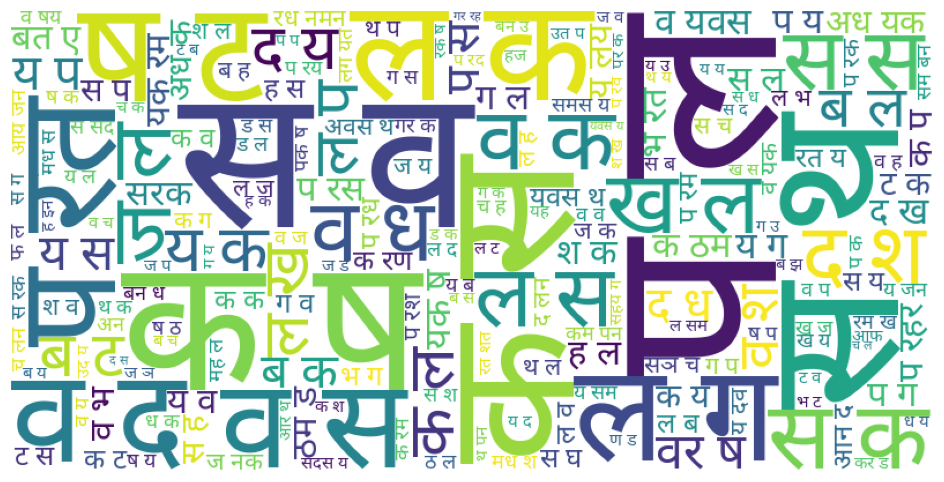

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off') # Hide axes
plt.show() # Display the plot

In [ ]:
!wget -O Nirmala.ttf https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf

--2025-09-16 02:05:48--  https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/notofonts/noto-fonts/raw/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf [following]
--2025-09-16 02:05:49--  https://github.com/notofonts/noto-fonts/raw/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/notofonts/noto-fonts/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf [following]
--2025-09-16 02:05:49--  https://raw.githubusercontent.com/notofonts/noto-fonts/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf
Resolving raw.githubusercont

In [ ]:
df.head()

,text,category,target,cleaned_text
0,"\r\n﻿\n४ असोज, हेटौंडा । आन्तरिक तथा बाह्य पर्...",Other,3,असोज हेटौंडा आन्तरिक बाह्य पर्यटक वृद्धि हेटौँ...
1,"\r\n﻿ \n\n२४ भदौ, चितवन । चितवनमा अन्य जिल्लाम...",National News,2,भदौ चितवन चितवन जिल्ला बढी स्क्रव टाइफस बिरामी...
2,"\r\n﻿तेह्रथुम, १३ असोज । तेह्रथुम छातेढुङगा–२ ...",National News,2,तेह्रथुम असोज तेह्रथुम छातेढुङगा– बुधबार अज्ञा...
3,\r\n﻿पाल्पाका ग्रामीण भेगका विद्यार्थीलाई दुई ...,Entertainment,1,पाल्पा ग्रामीण भेग विद्यार् घन्टा पैदल हिँडेर ...
4,\r\n﻿राज्यकोषमा सरकारको स्वेच्छाचारिता रोक्न व...,Other,3,राज्यकोष सरकार स्वेच्छाचारिता रोक्न व्यवस्थापि...


In [ ]:
df = df.drop(columns=['text','category']) #droping two columns

In [ ]:
df.head()

,target,cleaned_text
0,3,असोज हेटौंडा आन्तरिक बाह्य पर्यटक वृद्धि हेटौँ...
1,2,भदौ चितवन चितवन जिल्ला बढी स्क्रव टाइफस बिरामी...
2,2,तेह्रथुम असोज तेह्रथुम छातेढुङगा– बुधबार अज्ञा...
3,1,पाल्पा ग्रामीण भेग विद्यार् घन्टा पैदल हिँडेर ...
4,3,राज्यकोष सरकार स्वेच्छाचारिता रोक्न व्यवस्थापि...


## Model Building

In [ ]:
#applying SMOTE since our target variable is imbalance
df['target'].value_counts()

,count
target,
2,6704
4,2056
3,1589
0,1510
1,1056


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['target'])#creating x variable i.e. independent variable

In [ ]:
y = df['target']#creating output or dependent variable

In [ ]:
#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer#apply tf idf as a vector to convert text into meaningful vectors

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True,
                        max_features=5000,
                        min_df=5,
                        max_df=0.8,
                        ngram_range=(1,3))


In [ ]:
X = tfidf.fit_transform(df['cleaned_text']).toarray() #apply tfidf to the X

In [ ]:
y = df['target']

In [ ]:
#apply SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#applying ml models

In [ ]:
#creating ml naive bayes objects with default parameters
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
#train the model and predict
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.7901252983293556


In [ ]:
#train the model and predict
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.7702863961813843


In [ ]:
#train the model and predict
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))

0.6694510739856802


In [ ]:
#import other ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
#creating models
models = {
    'SVC': SVC (kernel="linear", C=1),
    'Random Forest' :RandomForestClassifier(),
    'xg': XGBClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    mode_train_accuracy = accuracy_score(y_train, y_train_pred) # calculate accuracy

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # calculate accuracy

    print(f"Model: {list(models.keys())[i]}")

    print("Training set performance")
    print("Accuracy: {:.4f}".format(mode_train_accuracy))


    print("\nTest set performance")
    print("Accuracy: {:.4f}".format(model_test_accuracy))


Model: SVC
Training set performance
Accuracy: 0.9298

Test set performance
Accuracy: 0.8868
Model: Random Forest
Training set performance
Accuracy: 0.9997

Test set performance
Accuracy: 0.9297
Model: xg
Training set performance
Accuracy: 0.9891

Test set performance
Accuracy: 0.9174


In [ ]:
#hyper parameter tuning of Naive Bayes (MultinomialNB)
params = {
    'alpha':  [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0],
    'fit_prior' : [True, False]
}

#gridsearch
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=mnb, param_grid=params, cv=3, n_jobs=-1,verbose=1)
grid_search.fit(X_train, y_train)

#best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'alpha': 0.1, 'fit_prior': True}


In [ ]:
#train the Multinomial Naive Bayes with hyper parameters
mnb = MultinomialNB(alpha = 0.1, fit_prior=True)
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.774164677804296


In [ ]:
# Hyperparameter tuning for random forest
params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
}

In [ ]:
# Models list for hyperparameter tuning
randomcv_models = [
    ("RF", RandomForestClassifier(), params)
]

In [ ]:
#applying randomized search cv for random forest
from sklearn.model_selection import RandomizedSearchCV


model_param = {}

for name, model, param in randomcv_models:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=-1
    )
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"------------------Best Parameters for {model_name}------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


------------------Best Parameters for RF------------------
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'class_weight': 'balanced', 'bootstrap': False}


In [ ]:
#train the random forest. note that applying hyper parameter gives the lower accuracy so train the model with default parameters
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_pred4 = random_forest.predict(X_test)
print(accuracy_score(y_test,y_pred4))

0.9288484486873508


In [ ]:
#applying logistic regression
lr = LogisticRegression(solver = 'saga',penalty = 'l2')
lr.fit(X_train,y_train)
y_pred5 = lr.predict(X_test)
print(accuracy_score(y_test,y_pred5))

0.8685859188544153


In [ ]:
params = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [ ]:
# Models list for hyperparameter tuning
randomcv_models = [
    ("xg", XGBClassifier(), params)
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name, model, param in randomcv_models:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=5,
        cv=2,
        verbose=2,
        n_jobs=-1
    )
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"------------------Best Parameters for {model_name}------------------")
    print(model_param[model_name])

Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


------------------Best Parameters for xg------------------
{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.7}


In [ ]:
#train the XG boost with hyper parameters
xg = XGBClassifier(subsample= 1.0,min_child_weight=5,
                   max_depth=7,
                   learning_rate=0.2,
                   colsample_bytree=0.7,
                   )
xg.fit(X_train, y_train)
y_pred6 = xg.predict(X_test)
print(accuracy_score(y_test,y_pred6))

0.9110978520286396


In [ ]:
params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag'],
    'max_iter': [100, 200, 500, 1000]
}


In [ ]:
# Models list for hyperparameter tuning
randomcv_models = [
    ("lr", LogisticRegression(), params)
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name, model, param in randomcv_models:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=50,
        cv=2,
        verbose=2,
        n_jobs=-1
    )
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"------------------Best Parameters for {model_name}------------------")
    print(model_param[model_name])

Fitting 2 folds for each of 50 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
58 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

------------------Best Parameters for lr------------------
{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1000, 'C': 10}


In [ ]:
#using hyper parameter
lr = LogisticRegression(class_weight='balanced',solver = 'liblinear',penalty = 'l2',max_iter=1000,
                        C=10)
lr.fit(X_train,y_train)
y_pred5 = lr.predict(X_test)
print(accuracy_score(y_test,y_pred5))

0.7533875338753387


In [ ]:
y_test

,target
7029,3
5513,0
26354,3
22655,1
4903,2
...,...
18253,1
26608,3
24631,3
3995,0


In [ ]:
print("Actual labels (y_test):")
print(y_test.values)  # or just y_test if it's an array

print("Predicted labels (y_pred4:")
print(y_pred4)


Actual labels (y_test):
[3 0 3 ... 3 0 3]
Predicted labels (y_pred4:
[3 0 3 ... 3 0 3]


In [ ]:
correct = (y_test.values == y_pred4).sum()
total = len(y_test)
print(f"Correct predictions: {correct} / {total}")


Correct predictions: 6227 / 6704


In [ ]:
y_pred4

array([3, 0, 3, ..., 3, 0, 3])

### Since we get the highest accuracy from Random Forest that is 0.9288. So, we will choose this algorithm.

In [ ]:
#dumping the model to use in website
import pickle
pickle.dump(tfidf,open('vector.pkl','wb'))
pickle.dump(random_forest, open('random_model.pkl','wb'))

In [ ]:
y_test

,target
10453,0
1744,4
921,0
9726,2
4505,4
...,...
2498,3
1851,2
11113,2
6951,2


In [ ]:
print(y_pred6)

[2 2 0 ... 2 2 0]


In [ ]:
#python version
!python --version

Python 3.12.11


In [ ]:
df.sample(30)

,target,cleaned_text
6932,0,असार नारायणगढ सेन्चुरी कमर्सियल बैंक बैंकिङ ऐन...
3128,1,काठमाडौँ चैत यसै साताबाट प्रदर्शन आउन लाग चलचि...
11423,2,महोत्तरी वैशाख सिंचाइ मन्त्री उमेशकुमार यादव द...
10468,3,प्रदीप गिरीनेपाली कांग्रेस महाधिवेशन स्वरुप प्...
5347,2,भक्तपुर राष्ट्रिय प्रजातन्त्र पार्टी अध्यक्ष प...
5391,2,विभेद विरुद्ध आवाज सम्बोधन हुनुपर्योः पाठकराजव...
6548,2,वीरगञ्ज वैशाख गोरखापत्र संस्थान सातौं वार्षिक ...
5761,2,पुस बागलुङ नेकपा एमाल महासचिव इश्वर पोख्रेल दे...
6636,2,राजविराज फागुन जारी मधेश आन्दोलन घाइते राजविरा...
8776,2,पुस काठमाडौं ताप्लेजुङ नगरपालि भाट स्थानीय बसा...


In [ ]:
df['cleaned_text'][4796]

'काठमाडौं युवा गायन प्रतिभा प्रोत्साहन उद्देश्य बाबुल म्युजिक कम्पनी जेठबाट देशव्यापी एकल खुल्ला गायन प्रतिस्पर्धा कम्पनी संगीतिक क्षेत्रबाट देश आर्थिक समृद्धि विकास जोड दिन लाग बता राजधानी पत्रकार सम्मेलन पिकेएम नेटवर्क संयोजन देशभरबाट एकल खुल्ला प्रतिस्पर्धा गराएर अन्तिम चरण ल्याउ आयोज बाह्रखरी बता गाउन चाह व्यक्ति लक्षित बृहत रूप गायन प्रतिस्पर्धा लाग कार्यक्रम संयोजक रामचन्द्र सुन्दास बताए प्रतिस्पर्धा अडिसन पोखरा बुटवल चितवन बर्दिवास बिर्तामोड इटहरी फिदिम काठमाडौं स्थान लिइ कार्यक्रम निर्णायक गजलकार गायक आनन्द कार् संगितकार राम सिटौला पूर्ण परियार गायि रजीना रिमाल गायक अजय अधिकारी विभिन्न चरण अतिथि निर्णायक ल्याइ सुन्दास बताए विजेता लाख नगद एउटा ल्यापटप दुईवटा गीत गाउ अवसर त्यस्तै हु नगद पचास हजार एकवटा गीत गाउ अवसर दिइ हु नगद हजार एकवटा गीत गाउ अवसर सान्तवना पुरस्कार जना नगद हजार एकएकवटा गीत गाउ अवसर प्रदान गरि आयोजक भनाइ जना वटा मोबाइल सेटसहित अवसर प्रदान गरि सुन्दास बताए प्रतियोगिता अडिसन उपत्य जेठ वाट सुरु गरि उपत्यकाभित्र असार गते आयोजना '